### Dataset Description 

> i will go through candy data 2017 , this data has :
- Internal_ID
- Q1-Going Out?: Are you actually going trick or treating yourself? "has values `Yes or No`"
- Q2-Gender: It has four different options, `Femal ,Male ,Other ,I'd rather not say`
- Q3-Age: Numerical field
- Q4-Country: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleanning
- Q5-State/Province: Text Field, but users have written their own version of the names. Same as the country data.
- Q6-Joy Or Despair: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).
- Q7-Joy Other: Text Field to write items not included above that give you JOY. Lots of missing values.
- Q8-Despair Other: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.
- Q9-Other Comments: Text Field. Lots of missing values.
- Q10-Dress: Binary field. Missing values present
- Unnamed: 113
- Q11-Day: Binary Answer Field. Missing values present

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel("candyhierarchy2017.xlsx")
df.shape

(2460, 120)

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,Na

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


## column names must be changed to be easily accesed

In [5]:
#strip special characters and set names to title
df.columns = df.columns.str.lstrip('Q0123456789|: ').str.title()
df.head(0)

,Internal Id,Going Out?,Gender,Age,Country,"State, Province, County, Etc",Grand Bar,Anonymous Brown Globs That Come In Black And Orange Wrappers\t(A.K.A. Mary Janes),Any Full-Sized Candy Bar,Black Jacks,Bonkers (The Candy),Bonkers (The Board Game),Bottle Caps,Box'O'Raisins,Broken Glow Stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy That Is Clearly Just The Stuff Given Out For Free At Restaurants,Caramellos,"Cash, Or Other Forms Of Legal Tender",Chardonnay,Chick-O-Sticks (We Don’T Know What That Is),Chiclets,Coffee Crisp,Creepy Religious Comics/Chick Tracts,Dental Paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow Sticks,Goo Goo Clusters,Good N' Plenty,Gum From Baseball Cards,Gummy Bears Straight Up,Hard Candy,Healthy Fruit,Heath Bar,Hershey'S Dark Chocolate,Hershey’S Milk Chocolate,Hershey'S Kisses,Hugs (Actual Physical Hugs),Jolly Rancher (Bad Flavor),Jolly Ranchers (Good Flavor),Joyjoy (Mit Iodine!),Junior Mints,Senior Mints,Kale Smoothie,Kinder Happy Hippo,Kit Kat,Laffytaffy,Lemonheads,Licorice (Not Black),Licorice (Yes Black),Lindt Truffle,Lollipops,Mars,Maynards,Mike And Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’S,Blue M&M'S,Red M&M'S,Green Party M&M'S,Independent M&M'S,Abstained From M&M'Ing.,Minibags Of Chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'N'Laters,Peeps,Pencils,Pixy Stix,Real Housewives Of Orange County Season 9 Blue-Ray,Reese’S Peanut Butter Cups,Reese'S Pieces,Reggie Jackson Bar,Rolos,Sandwich-Sized Bags Filled With Booberry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (I.E. Abominations Of Nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (A Friend To Diabetes),Take 5,Tic Tacs,Those Odd Marshmallow Circus Peanut Things,Three Musketeers,Tolberone Something Or Other,Trail Mix,Twix,"Vials Of Pure High Fructose Corn Syrup, For Main-Lining Into Your Vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat Anything,York Peppermint Patties,Joy Other,Despair Other,Other Comments,Dress,Unnamed: 113,Day,Media [Daily Dish],Media [Science],Media [Espn],Media [Yahoo],"Click Coordinates (X, Y)"


 ## "Unnamed: 113" column isn't useful ,we have to drop it

In [6]:
df["Unnamed: 113"].unique()

array([nan,
       'dress (https://survey.ubc.ca/media/assets/user/14372/storage/dress.png)'],
      dtype=object)

In [7]:
df.drop("Unnamed: 113",axis=1,inplace=True)

## check "Country" values

In [8]:
df["Country"].unique()

array([nan, 'USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', 35,
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', 46, 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', 45, 'United State', 32, 'France',
       'australia', 'A', 'Can', 'Canae', 'New York', 'Trumpistan',
       'Ireland', 'United Sates', 'Korea', 

more than one value for the same category

In [9]:
#strip spaces and lower names
df["Country"]= df["Country"].str.lower()
df["Country"]= df["Country"].str.strip()
df["Country"].unique()

array([nan, 'usa', 'us', 'canada', 'murica', 'united states', 'uk',
       'united kingdom', 'united staes', 'united states of america',
       'uae', 'england', 'mexico', 'u.s.a.', 'usausausa', 'america',
       'france', 'finland', 'unhinged states', 'us of a', 'unites states',
       'the united states', 'north carolina', 'unied states',
       'netherlands', 'germany', 'europe', 'earth', 'u s', 'u.s.', 'u.k.',
       'costa rica', 'the united states of america', 'unite states',
       'cascadia', 'australia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', "'merica", 'usas', 'pittsburgh',
       'united state', 'a', 'can', 'canae', 'new york', 'trumpistan',
       'ireland', 'united sates', 'korea', 'california', 'japan',
       'south africa',
       'i pretend to be from canada, but i am really from the united states.',
       'iceland', 'canada`', 'scotland', 'denmark', 'united stated',
       'switzerland', 'ahem....amerca', 'ud', 'south korea', 'new jersey',

In [10]:
#mapping the "usa" categories into single one
usa_lst = ['us','murica', 'united stated','united states','united staes', 'united states of america','u.s.a.', 
           'usausausa', 'america',
        'unhinged states', 'us of a', 'unites states','the united states','unied states','u s', 'u.s.',
         'the united states of america','unite states','usa? hard to tell anymore..', "'merica", 'usas','united state', 'a',
        'new york','united sates','i pretend to be from canada, but i am really from the united states.','california',
        'ahem....amerca','new jersey','united statss','united ststes','murrika', 'usa! usa! usa!', 'usaa','n. america',
        'ussa','u s a','united statea','usa usa usa!!!!','alaska','north carolina','pittsburgh','trumpistan']
df["Country"].replace(usa_lst , "usa" ,inplace = True)
df["Country"].unique()

array([nan, 'usa', 'canada', 'uk', 'united kingdom', 'uae', 'england',
       'mexico', 'france', 'finland', 'netherlands', 'germany', 'europe',
       'earth', 'u.k.', 'costa rica', 'cascadia', 'australia',
       'insanity lately', 'greece', 'can', 'canae', 'ireland', 'korea',
       'japan', 'south africa', 'iceland', 'canada`', 'scotland',
       'denmark', 'switzerland', 'ud', 'south korea', 'indonesia',
       'the netherlands', 'endland', 'atlantis', 'soviet canuckistan',
       'singapore', 'china', 'taiwan', 'hong kong', 'spain', 'sweden',
       'narnia', 'subscribe to dm4uz3 on youtube', "i don't know anymore",
       'fear and loathing'], dtype=object)

In [11]:
#mapping the "canada" categories into single one
df["Country"].replace(['can','canae', 'canada`'],"canada",inplace = True)
df["Country"].unique()

array([nan, 'usa', 'canada', 'uk', 'united kingdom', 'uae', 'england',
       'mexico', 'france', 'finland', 'netherlands', 'germany', 'europe',
       'earth', 'u.k.', 'costa rica', 'cascadia', 'australia',
       'insanity lately', 'greece', 'ireland', 'korea', 'japan',
       'south africa', 'iceland', 'scotland', 'denmark', 'switzerland',
       'ud', 'south korea', 'indonesia', 'the netherlands', 'endland',
       'atlantis', 'soviet canuckistan', 'singapore', 'china', 'taiwan',
       'hong kong', 'spain', 'sweden', 'narnia',
       'subscribe to dm4uz3 on youtube', "i don't know anymore",
       'fear and loathing'], dtype=object)

In [12]:
#replace 'hong kong' with "china"
df["Country"].replace('hong kong' ,"china",inplace =True)
df["Country"].unique()

array([nan, 'usa', 'canada', 'uk', 'united kingdom', 'uae', 'england',
       'mexico', 'france', 'finland', 'netherlands', 'germany', 'europe',
       'earth', 'u.k.', 'costa rica', 'cascadia', 'australia',
       'insanity lately', 'greece', 'ireland', 'korea', 'japan',
       'south africa', 'iceland', 'scotland', 'denmark', 'switzerland',
       'ud', 'south korea', 'indonesia', 'the netherlands', 'endland',
       'atlantis', 'soviet canuckistan', 'singapore', 'china', 'taiwan',
       'spain', 'sweden', 'narnia', 'subscribe to dm4uz3 on youtube',
       "i don't know anymore", 'fear and loathing'], dtype=object)

In [13]:
#mapping the "england" categories into single one
uk_lst = ['united kingdom','england','u.k.',"endland"]
df["Country"].replace(uk_lst, "uk" ,inplace = True)
df["Country"].unique()

array([nan, 'usa', 'canada', 'uk', 'uae', 'mexico', 'france', 'finland',
       'netherlands', 'germany', 'europe', 'earth', 'costa rica',
       'cascadia', 'australia', 'insanity lately', 'greece', 'ireland',
       'korea', 'japan', 'south africa', 'iceland', 'scotland', 'denmark',
       'switzerland', 'ud', 'south korea', 'indonesia', 'the netherlands',
       'atlantis', 'soviet canuckistan', 'singapore', 'china', 'taiwan',
       'spain', 'sweden', 'narnia', 'subscribe to dm4uz3 on youtube',
       "i don't know anymore", 'fear and loathing'], dtype=object)

In [14]:
#replace meaningless values to missing one
NaN_values = ['fear and loathing',"i don't know anymore",'narnia','subscribe to dm4uz3 on youtube','insanity lately','earth']
df["Country"].replace(NaN_values,np.nan,inplace = True)
df["Country"].unique()

array([nan, 'usa', 'canada', 'uk', 'uae', 'mexico', 'france', 'finland',
       'netherlands', 'germany', 'europe', 'costa rica', 'cascadia',
       'australia', 'greece', 'ireland', 'korea', 'japan', 'south africa',
       'iceland', 'scotland', 'denmark', 'switzerland', 'ud',
       'south korea', 'indonesia', 'the netherlands', 'atlantis',
       'soviet canuckistan', 'singapore', 'china', 'taiwan', 'spain',
       'sweden'], dtype=object)

almost "country" values are convienent and unique

## checking and dealing with missing values

<AxesSubplot:>

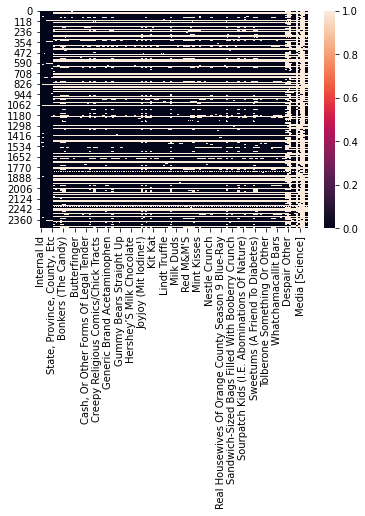

In [15]:
#heat map of df's missing values
sns.heatmap(df.isna())

There are huge number of missing values

column with more than 1000(nearly half) Nan isn't useful ,so it'd be better drop them

In [16]:
sum_nan = df.isna().sum()
useless_col = sum_nan[sum_nan > 1000]
df[sum_nan[sum_nan > 1000].index].head()

,Bonkers (The Board Game),Joyjoy (Mit Iodine!),Maynards,Reggie Jackson Bar,Sweetums (A Friend To Diabetes),Joy Other,Despair Other,Other Comments,Media [Daily Dish],Media [Science],Media [Espn],Media [Yahoo]
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,NaN,1.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DESPAIR,DESPAIR,MEH,MEH,MEH,"Reese's crispy crunchy bars, 5th avenue bars, ...",NaN,Raisins can go to hell,NaN,1.0,NaN,NaN
4,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [17]:
df.drop(useless_col.index , axis = 1 ,inplace = True)

### To replace missing values with custom value(mean,median,mode ..etc),you should check column data type and assert that's true

In [18]:
#check columns data type
df.dtypes

Internal Id                                                                           int64
Going Out?                                                                           object
Gender                                                                               object
Age                                                                                  object
Country                                                                              object
State, Province, County, Etc                                                         object
Grand Bar                                                                            object
Anonymous Brown Globs That Come In Black And Orange Wrappers\t(A.K.A. Mary Janes)    object
Any Full-Sized Candy Bar                                                             object
Black Jacks                                                                          object
Bonkers (The Candy)                                                             

### change some columns data type

In [19]:
#change data type of "Going Out?","Gender","Country","State, Province, County, Etc" ,"Dress","Day" into category
#change data type of "Age" into "int"
df["Going Out?"] = df["Going Out?"].astype("category")
df["Gender"] = df["Gender"].astype("category")
df["Country"] = df["Country"].astype("category")
df["State, Province, County, Etc"] = df["State, Province, County, Etc"].astype("category")
df["Dress"] = df["Dress"].astype("category")
df["Day"] = df["Day"].astype("category")
df["Click Coordinates (X, Y)"] = df["Click Coordinates (X, Y)"].astype("category")
df["Age"] = pd.to_numeric(df["Age"],errors = 'coerce')

### check columns values before replacing missing values

In [20]:
df["Gender"].unique()
#correct values

[NaN, 'Male', 'Female', 'I'd rather not say', 'Other']
Categories (4, object): ['Male', 'Female', 'I'd rather not say', 'Other']

In [21]:
df["Going Out?"].unique()
#correct values

[NaN, 'No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [22]:
df["Country"].unique()
#correct values

[NaN, 'usa', 'canada', 'uk', 'uae', ..., 'singapore', 'china', 'taiwan', 'spain', 'sweden']
Length: 34
Categories (33, object): ['usa', 'canada', 'uk', 'uae', ..., 'china', 'taiwan', 'spain', 'sweden']

In [23]:
df["Dress"].unique()
#correct values

[NaN, 'White and gold', 'Blue and black']
Categories (2, object): ['White and gold', 'Blue and black']

In [24]:
df["Day"].unique()
#correct values

[NaN, 'Sunday', 'Friday']
Categories (2, object): ['Sunday', 'Friday']

In [25]:
#check Click Coordinates (X, Y) values
df["Click Coordinates (X, Y)"].unique()

[NaN, '(84, 25)', '(75, 23)', '(70, 10)', '(55, 5)', ..., '(67, 13)', '(62, 4)', '(68, 39)', '(67, 35)', '(19, 26)']
Length: 953
Categories (952, object): ['(84, 25)', '(75, 23)', '(70, 10)', '(55, 5)', ..., '(62, 4)', '(68, 39)', '(67, 35)', '(19, 26)']

### replace missing values

In [26]:
#replace missing values of categorical columns with its mode 
df.fillna({"Going Out?" : df["Going Out?"].mode()[0] ,"Gender" : df["Gender"].mode()[0],"Country" : df["Country"].mode()[0],
           "State, Province, County, Etc" : df["State, Province, County, Etc"].mode()[0],
           "Dress" : df["Dress"].mode()[0],"Day" : df["Day"].mode()[0],
           "Click Coordinates (X, Y)" :df["Click Coordinates (X, Y)"].mode()[0]},inplace = True)
df.isna().sum()

Internal Id                                                                            0
Going Out?                                                                             0
Gender                                                                                 0
Age                                                                                  108
Country                                                                                0
State, Province, County, Etc                                                           0
Grand Bar                                                                            747
Anonymous Brown Globs That Come In Black And Orange Wrappers\t(A.K.A. Mary Janes)    734
Any Full-Sized Candy Bar                                                             672
Black Jacks                                                                          958
Bonkers (The Candy)                                                                  992
Bottle Caps          

C:\Users\mhmde\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


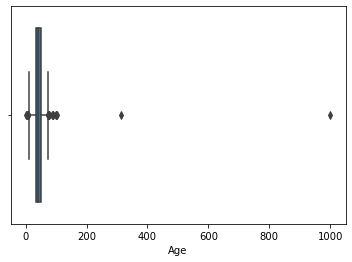

In [27]:
#show "Age" distribution
sns.boxplot(df["Age"])
plt.show()

"Age" has outliers

C:\Users\mhmde\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


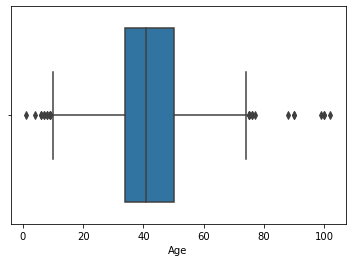

In [28]:
#replace outliers with median
df.loc[df["Age"] > 150,"Age"] = df["Age"].median()
sns.boxplot(df["Age"])
plt.show()

In [29]:
#replace "Age" missing values with mean
df["Age"].fillna(df["Age"].median(),inplace = True)

### melting dataframe

In [30]:
#melting dataframe into long format
df = df.melt(id_vars=['Internal Id','Going Out?','Gender','Age','Country','State, Province, County, Etc',
                'Dress','Day','Click Coordinates (X, Y)'],var_name = "Name",value_name = "kind")
df.head()

,Internal Id,Going Out?,Gender,Age,Country,"State, Province, County, Etc",Dress,Day,"Click Coordinates (X, Y)",Name,kind
0,90258773,No,Male,41.0,usa,California,White and gold,Friday,"(77, 24)",Grand Bar,NaN
1,90272821,No,Male,44.0,usa,NM,White and gold,Sunday,"(84, 25)",Grand Bar,MEH
2,90272829,No,Male,49.0,usa,Virginia,White and gold,Friday,"(77, 24)",Grand Bar,NaN
3,90272840,No,Male,40.0,usa,or,White and gold,Sunday,"(75, 23)",Grand Bar,MEH
4,90272841,No,Male,23.0,usa,exton pa,White and gold,Friday,"(70, 10)",Grand Bar,JOY


In [31]:
#check "kind" values
df["kind"].unique()

array([nan, 'MEH', 'JOY', 'DESPAIR'], dtype=object)

In [32]:
#replace missing values of "kind" with "don't know"
df["kind"].fillna("Don't know",inplace = True)
df["kind"] = df["kind"].astype("category")
df["kind"].unique()

['Don't know', 'MEH', 'JOY', 'DESPAIR']
Categories (4, object): ['Don't know', 'MEH', 'JOY', 'DESPAIR']

In [33]:
df.isna().any()

Internal Id                     False
Going Out?                      False
Gender                          False
Age                             False
Country                         False
State, Province, County, Etc    False
Dress                           False
Day                             False
Click Coordinates (X, Y)        False
Name                            False
kind                            False
dtype: bool

No missing values in data

## check for duplicates

In [34]:
df.duplicated().sum()

0

* NO duplicates 

In [35]:
df.head()

,Internal Id,Going Out?,Gender,Age,Country,"State, Province, County, Etc",Dress,Day,"Click Coordinates (X, Y)",Name,kind
0,90258773,No,Male,41.0,usa,California,White and gold,Friday,"(77, 24)",Grand Bar,Don't know
1,90272821,No,Male,44.0,usa,NM,White and gold,Sunday,"(84, 25)",Grand Bar,MEH
2,90272829,No,Male,49.0,usa,Virginia,White and gold,Friday,"(77, 24)",Grand Bar,Don't know
3,90272840,No,Male,40.0,usa,or,White and gold,Sunday,"(75, 23)",Grand Bar,MEH
4,90272841,No,Male,23.0,usa,exton pa,White and gold,Friday,"(70, 10)",Grand Bar,JOY


In [36]:
df.shape

(241080, 11)

## conclusion

* column names weren't simple ,so we make some changes to make it easy to access

* correct column data types :
       1-changed "Going Out?","Gender","Country","State, Province, County, Etc","Dress","Day" into category
       2-changed "Age" into integer

* data had large number of missing values ,we did some steps to deal solve that :
        1- dropped columns that have more than 1000 missing values
        2- replaced missing values in categorical columns with mode
        3- replaced missing values in "Age" column with median

* names of chocolate make data high dimensionalilty so it'd be better melting them into to column "name" and "kind" refer to ["MEH" ,"DESPAIR","JOY] and replaced missing values with "don't know

* No duplicates in data